In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import glob
import pickle

In [3]:
def get_results(needed_task, loss=True):
    results = {}
    for path in glob.glob('./to_reproduce/results/*'):
        spl = path.split('/')
        info = spl[-1]
        info_spl = info.split('_')
        alg = info_spl[0]
        i = 0
        if alg not in ['adam', 'adagrad']:
            alg = '_'.join(info_spl[:2])
            i = 1
        task = info_spl[i + 1]
        if task != needed_task:
            continue
        starting_point = info_spl[i + 2]
        params = '_'.join(info_spl[i + 3:])
        if loss:
            with open(path + '/epoch_losses.pickle', 'rb') as f:
                losses = pickle.load(f)
        else:
            with open(path + '/epoch_test_accs.pickle', 'rb') as f:
                losses = pickle.load(f)

        try:
            results[alg][params].append(losses)
        except:
            try:
                results[alg].update({params: [losses]})
            except:
                results[alg] = {params: [losses]}
                
    mean_by_start_results = {}
    for key in results:
        for params in results[key]:
            try:
                mean_by_start_results[key].update({params: np.mean(np.array(results[key][params]), axis=0)})
            except:
                mean_by_start_results[key] = {params: np.mean(np.array(results[key][params]), axis=0)}
    bests = {}
    medians = {}
    for key in mean_by_start_results:
        items = list(mean_by_start_results[key].items())
        best = sorted(items, key=lambda x: x[-1][-1])[0]
        bests[key] = [best[0], best[1]]
        median = np.median(np.array([x[1] for x in items]), axis=0)
        std = np.std(np.array([x[1] for x in items]), axis=0)
        medians[key] = [median, std]
    return bests, medians

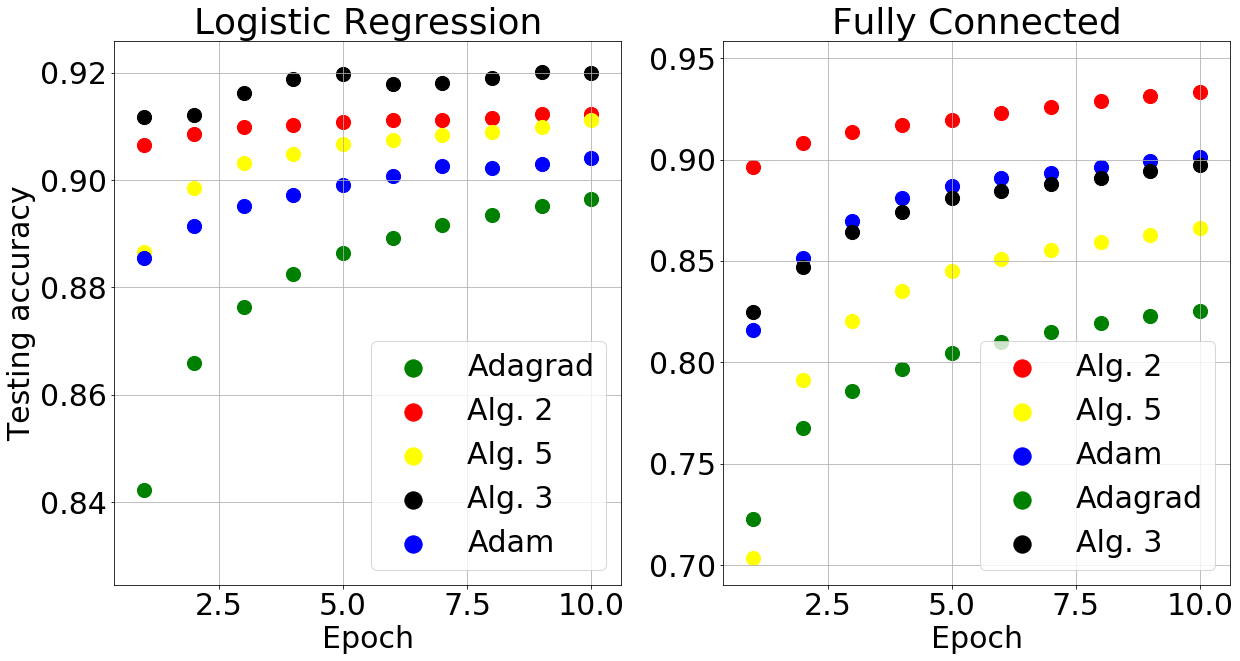

In [6]:
plt.rcParams.update({'font.size': 30})
lr_best, lr_median = get_results('LogisticRegression', False)
fc_best, fc_median = get_results('FullyConnected', False)

fig = plt.figure(figsize=(20, 10))
point_size = 200
legend_font_size = 30
legend_mark_size = 300


plt.subplot(1, 2, 1)
for alg in lr_median:
    if alg == 'adaptive_convex':
        label = 'Alg. 2'
        col = 'red'
    elif alg == 'accelerated_adaptive':
        label = 'Alg. 3'
        col = 'black'
    elif alg == 'adaptive_nonconvex':
        label = 'Alg. 5'
        col = 'yellow'
    elif alg == 'adam':
        label = 'Adam'
        col = 'blue'
    elif alg == 'adagrad':
        label = 'Adagrad'
        col = 'green'
    plt.scatter(range(1, 11), lr_median[alg][0], s=point_size, label=label, color=col)
plt.title('Logistic Regression')
plt.xlabel('Epoch')
plt.ylabel('Testing accuracy')
lgnd = plt.legend(prop={'size': legend_font_size})
lgnd.legendHandles[0]._sizes = [legend_mark_size]
lgnd.legendHandles[1]._sizes = [legend_mark_size]
lgnd.legendHandles[2]._sizes = [legend_mark_size]
lgnd.legendHandles[3]._sizes = [legend_mark_size]
lgnd.legendHandles[4]._sizes = [legend_mark_size]
plt.grid(True)

plt.subplot(1, 2, 2)
for alg in fc_median:
    if alg == 'adaptive_convex':
        label = 'Alg. 2'
        col = 'red'
    elif alg == 'accelerated_adaptive':
        label = 'Alg. 3'
        col = 'black'
    elif alg == 'adaptive_nonconvex':
        label = 'Alg. 5'
        col = 'yellow'
    elif alg == 'adam':
        label = 'Adam'
        col = 'blue'
    elif alg == 'adagrad':
        label = 'Adagrad'
        col = 'green'
    plt.scatter(range(1, 11), fc_median[alg][0], s=point_size, label=label, color=col)
plt.title('Fully Connected')
plt.xlabel('Epoch')
lgnd = plt.legend(prop={'size': legend_font_size})
lgnd.legendHandles[0]._sizes = [legend_mark_size]
lgnd.legendHandles[1]._sizes = [legend_mark_size]
lgnd.legendHandles[2]._sizes = [legend_mark_size]
lgnd.legendHandles[3]._sizes = [legend_mark_size]
lgnd.legendHandles[4]._sizes = [legend_mark_size]
plt.grid(True)

fig.savefig('./averaged_test')